In [5]:
!pip install pandas numpy matplotlib

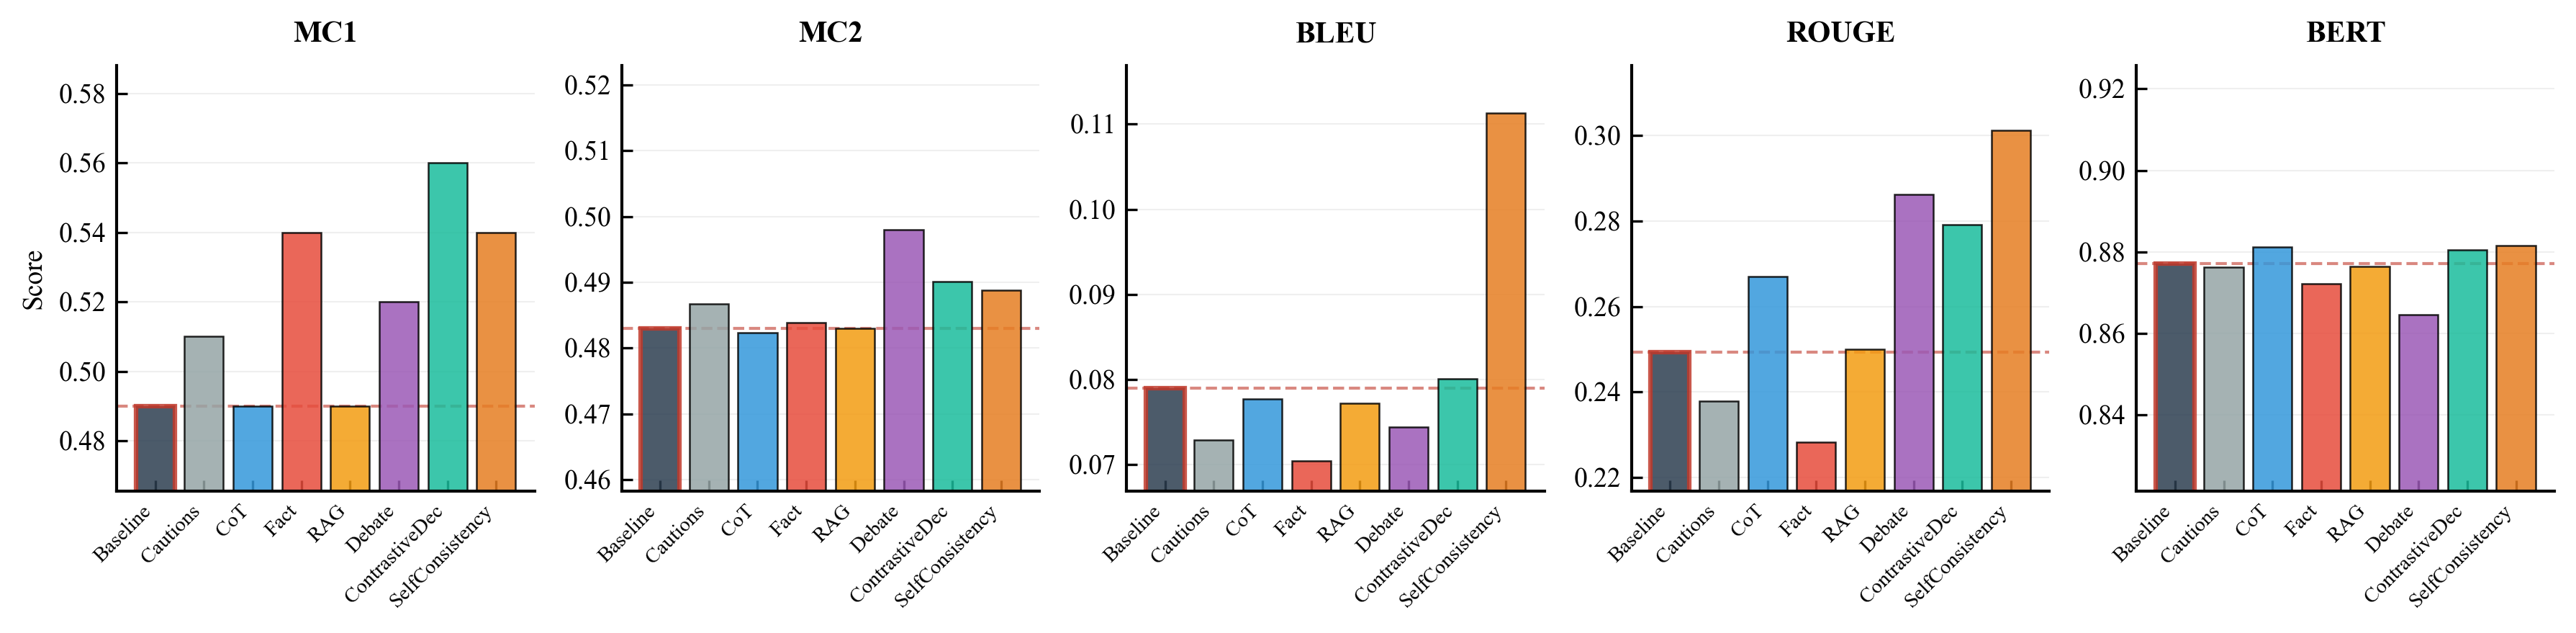

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reset and configure for publication quality
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 9,
    'axes.linewidth': 1.0,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5,
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'figure.dpi': 300
})

data = {
    'Strategy': ['Baseline', 'Cautions', 'CoT', 'Fact', 'RAG', 'Debate', 'ContrastiveDec', 'SelfConsistency'],
    'MC1': [0.49, 0.51, 0.49, 0.54, 0.49, 0.52, 0.56, 0.54],
    'MC2': [0.483, 0.4867, 0.4824, 0.4839, 0.483, 0.498, 0.4901, 0.4888],
    'BLEU': [0.079, 0.0729, 0.0777, 0.0704, 0.0772, 0.0744, 0.0801, 0.1113],
    'ROUGE': [0.2493, 0.2378, 0.2671, 0.2282, 0.25, 0.2862, 0.2792, 0.3013],
    'BERT': [0.8771, 0.8762, 0.8812, 0.8722, 0.8765, 0.8645, 0.8805, 0.8816]
}
df = pd.DataFrame(data)

# Create figure with 5 subplots (one per metric) - common in academic papers
fig, axes = plt.subplots(1, 5, figsize=(12, 3), sharey=False, dpi=300)

metrics = ['MC1', 'MC2', 'BLEU', 'ROUGE', 'BERT']

# Professional grayscale + accent colors
colors_v2 = ['#2C3E50',  # Baseline - dark blue-gray
             '#95A5A6',  # Cautions - gray
             '#3498DB',  # CoT - blue
             '#E74C3C',  # Fact - red
             '#F39C12',  # RAG - orange
             '#9B59B6',  # Debate - purple
             '#1ABC9C',  # ContrastiveDec - teal
             '#E67E22']  # SelfConsistency - dark orange

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Get values for this metric
    values = df[metric].values
    strategies = df['Strategy'].values
    baseline_val = values[0]
    
    # Create bars
    bars = ax.bar(range(len(strategies)), values, color=colors_v2, 
                   alpha=0.85, edgecolor='black', linewidth=0.6)
    
    # Highlight baseline bar
    bars[0].set_edgecolor('#C0392B')
    bars[0].set_linewidth(1.5)
    
    # Add baseline reference line
    ax.axhline(y=baseline_val, color='#C0392B', linestyle='--', 
               linewidth=1.0, alpha=0.6, zorder=0)
    
    # Styling
    ax.set_title(metric, fontsize=10, fontweight='bold', pad=8)
    ax.set_xticks(range(len(strategies)))
    ax.set_xticklabels(strategies, rotation=45, ha='right', fontsize=7)
    ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set y-label only for first subplot
    if idx == 0:
        ax.set_ylabel('Score', fontsize=9, fontweight='normal')
    
    # Adjust y-limits for better visualization
    ymin = min(values) * 0.95
    ymax = max(values) * 1.05
    ax.set_ylim(ymin, ymax)

# Add overall title
#fig.suptitle('Performance of Hallucination Mitigation Strategies Across Evaluation Metrics',
#             fontsize=11, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('hallucination_mitigation_subplots.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')

plt.show()
